0.9795047856845609


c:\Users\Melzarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Melzarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


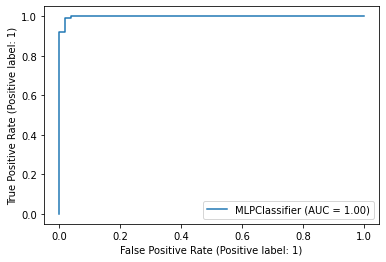

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)
yPred = model.predict(X_test)

print(roc_auc_score(y_test, yPred))
plot_roc_curve(model, X_test, y_test)
plt.show()

In [6]:
print(yPred)
print(yPred.shape)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
(143,)


In [2]:
yPred_p = model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, yPred_p))

0.9983354140657512


In [7]:
print(yPred_p)
print(yPred_p.shape)

[7.73328616e-01 4.45046744e-04 9.99174559e-03 9.95018977e-01
 9.98291085e-01 4.38395596e-07 4.31248317e-06 8.83065152e-02
 4.83436184e-01 9.80360802e-01 8.96512006e-01 4.24827893e-02
 9.62073369e-01 2.54635979e-01 9.75899433e-01 6.78942555e-03
 9.79499813e-01 9.99099400e-01 9.99782981e-01 8.72983261e-05
 7.09512969e-01 9.61070600e-01 6.38026213e-06 9.97146260e-01
 9.86010537e-01 9.94515664e-01 9.62995670e-01 9.70123334e-01
 9.84397078e-01 3.12583349e-04 9.92043429e-01 9.95162499e-01
 9.94411002e-01 9.73158668e-01 9.98270965e-01 9.85250708e-01
 2.35578172e-01 9.84381532e-01 1.84720561e-03 8.71960473e-01
 9.98034370e-01 1.42581283e-02 9.62165444e-01 9.85962638e-01
 9.22077600e-01 9.05166809e-01 9.99250469e-01 9.90138198e-01
 9.24589221e-01 9.61510525e-01 2.54212407e-03 1.60176809e-05
 7.29568090e-01 9.73447393e-01 9.99514945e-01 8.84268782e-01
 9.97492183e-01 3.04598821e-07 1.07854532e-01 9.95295956e-01
 9.64536801e-01 7.34779164e-05 1.38178444e-05 8.68719701e-01
 9.94736103e-01 6.736532

Text(0.5, 0, 'False Positive Rate')

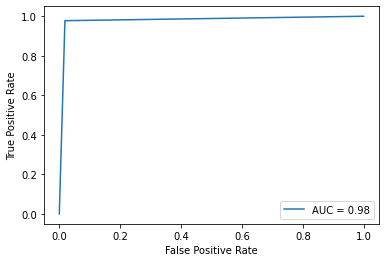

In [3]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, yPred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = ' + str(round(roc_auc, 2)))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')